<a href="https://colab.research.google.com/github/atg1996/python-tasks/blob/main/hw_03_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming assignment 3: Probabilistic Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import loggamma
%matplotlib inline  

## Your task
This notebook contains code implementing the methods discussed in `Lecture 3: Probabilistic Inference`. Some functions in this notebook are incomplete. Your task is to fill in the missing code and run the entire notebook. 

In the beginning of every function there is docstring, which specifies the format of input and output. Write your code in a way that adheres to it.
You may only use plain python and `numpy` functions (i.e. no scikit-learn classifiers).

## Simulating data
The following function simulates flipping a biased coin. 

In [2]:
# This function is given, nothing to do here.
def simulate_data(num_samples, tails_proba):
    """Simulate a sequence of i.i.d. coin flips.
    
    Tails are denoted as 1 and heads are denoted as 0.
    
    Parameters
    ----------
    num_samples : int
        Number of samples to generate.
    tails_proba : float in range (0, 1)
        Probability of observing tails.
    
    Returns
    -------
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    """
    return np.random.choice([0, 1], size=(num_samples), p=[1 - tails_proba, tails_proba])

In [3]:
np.random.seed(123)  # for reproducibility
num_samples = 20
tails_proba = 0.7
samples = simulate_data(num_samples, tails_proba)
print(samples)

[1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1]


# Important: Numerical stability
When dealing with probabilities, we often encounter extremely small numbers. Because of limited floating point precision, directly manipulating such small numbers can lead to serious numerical issues, such as overflows and underflows. Therefore, we usually work in the **log-space**.

For example, if we want to multiply two tiny numbers $a$ and $b$, we should compute $\exp(\log(a) + \log(b))$ instead of naively multiplying $a \cdot b$.

For this reason, we usually compute **log-probabilities** instead of **probabilities**. Virtually all machine learning libraries are dealing with log-probabilities instead of probabilities (e.g. [Tensorflow-probability](https://www.tensorflow.org/probability) or [Pyro](https://pyro.ai)).

## Task 1: Compute $\log p(\mathcal{D} \mid \theta)$ for different values of $\theta$

In [4]:
def compute_log_likelihood(theta, samples):
    """Compute log p(D | theta) for the given values of theta.
    
    Parameters
    ----------
    theta : array, shape (num_points)
        Values of theta for which it's necessary to evaluate the log-likelihood.
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    
    Returns
    -------
    log_likelihood : array, shape (num_points)
        Values of log-likelihood for each value in theta.
    """

    # log_likelihood = np.sum(samples * np.log(theta) + (1 - samples) * np.log(1 - theta), axis=1)

    # return log_likelihood


    n_tails = np.sum(samples == 1)
    n_heads = len(samples) - n_tails

    log_likelihood = n_tails * np.log(theta) + n_heads * np.log(1 - theta)
    
    return log_likelihood

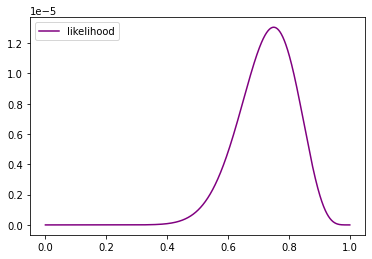

In [5]:
x = np.linspace(1e-5, 1-1e-5, 1000)
log_likelihood = compute_log_likelihood(x, samples)

likelihood = np.exp(log_likelihood)
plt.plot(x, likelihood, label='likelihood', c='purple')
plt.legend()

Note that the likelihood function doesn't define a probability distribution over $\theta$ --- the integral $\int_{0}^{1} p(\mathcal{D} \mid \theta) d\theta$ is not equal to one.

To show this, we approximate $\int_{0}^{1} p(\mathcal{D} \mid \theta) d\theta$ numerically using [the rectangle rule](https://en.wikipedia.org/wiki/Riemann_sum).

In [6]:
# 1.0 is the length of the interval over which we are integrating p(D | theta)
int_likelihood = 1.0 * np.mean(likelihood)
print(f'Integral = {int_likelihood:.4}')

Integral = 3.068e-06


## Task 2: Compute $\log p(\theta \mid a, b)$ for different values of $\theta$
The function `loggamma` from the `scipy.special` package might be useful here. (It's already imported - see the first cell)

In [7]:
def compute_log_prior(theta, a, b):
    """Compute log p(theta | a, b) for the given values of theta.
    
    Parameters
    ----------
    theta : array, shape (num_points)
        Values of theta for which it's necessary to evaluate the log-prior.
    a, b: float
        Parameters of the prior Beta distribution.
    
    Returns
    -------
    log_prior : array, shape (num_points)
        Values of log-prior for each value in theta.
    
    """
    ### YOUR CODE HERE ###
    log_prior = loggamma(a + b) - loggamma(a) - loggamma(b) + (a - 1) * np.log(theta) + (b - 1) * np.log(1 - theta)
    return log_prior

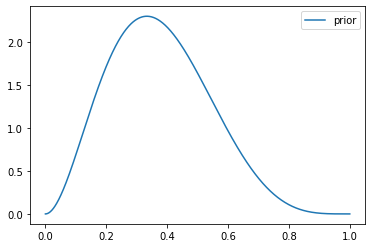

In [8]:
x = np.linspace(1e-5, 1-1e-5, 1000)
a, b = 3, 5

# Plot the prior distribution
log_prior = compute_log_prior(x, a, b)
prior = np.exp(log_prior)
plt.plot(x, prior, label='prior')
plt.legend()

Unlike the likelihood, the prior defines a probability distribution over $\theta$ and integrates to 1.

In [9]:
int_prior = 1.0 * np.mean(prior)
print(f'Integral = {int_prior:.4}')

Integral = 0.999


## Task 3: Compute $\log p(\theta \mid \mathcal{D}, a, b)$ for different values of $\theta$
The function `loggamma` from the `scipy.special` package might be useful here.

In [10]:
def compute_log_posterior(theta, samples, a, b):
    """Compute log p(theta | D, a, b) for the given values of theta.
    
    Parameters
    ----------
    theta : array, shape (num_points)
        Values of theta for which it's necessary to evaluate the log-prior.
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    a, b: float
        Parameters of the prior Beta distribution.
    
    Returns
    -------
    log_posterior : array, shape (num_points)
        Values of log-posterior for each value in theta.
    """
    # log_prior = compute_log_prior(theta, a, b)
    # log_likelihood = compute_log_likelihood(theta, samples)

    # # Compute log p(theta | D, a, b) up to a constant using Bayes' rule
    # log_posterior = log_likelihood + log_prior

    # # Normalize log-posterior to get log-p(theta | D, a, b) as a probability distribution
    # log_posterior -= np.max(log_posterior)  # Subtract the log of the maximum value to avoid numerical issues
    # log_posterior -= np.log(np.sum(np.exp(log_posterior)))  # Take the log-sum-exp to normalize

    # return log_posterior

    log_likelihood = compute_log_likelihood(theta, samples)
    log_prior = compute_log_prior(theta, a, b)

    likelihood = np.exp(log_likelihood)
    prior = np.exp(log_prior)

    value = log_likelihood + compute_log_prior(theta, a, b) - np.log(np.sum( likelihood * prior )/ len(theta) )
    return value 

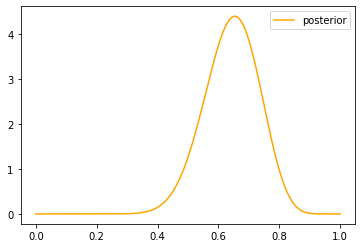

In [11]:
x = np.linspace(1e-5, 1-1e-5, 1000)

log_posterior = compute_log_posterior(x, samples, a, b)
posterior = np.exp(log_posterior)
plt.plot(x, posterior, label='posterior', c='orange')
plt.legend()

Like the prior, the posterior defines a probability distribution over $\theta$ and integrates to 1.

In [12]:
int_posterior = 1.0 * np.mean(posterior)
print(f'Integral = {int_posterior:.4}')

Integral = 1.0


## Task 4: Compute $\theta_{MLE}$

In [20]:
def compute_theta_mle(samples):
    """Compute theta_MLE for the given data.
    
    Parameters
    ----------
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    
    Returns
    -------
    theta_mle : float
        Maximum likelihood estimate of theta.
    """
    # # Define the negative log-likelihood function
    # def log_likelihood(theta):
    #     p = np.power(theta, np.sum(samples)) * np.power(1 - theta, len(samples) - np.sum(samples))
    #     return np.log(p)
    
    # eps = 1e-8
    # grad = (log_likelihood(1 - eps) - log_likelihood(eps)) / (2 * eps)
    # theta_mle = 1 / (1 + np.exp(-grad))
    
    # return theta_mle

    thetas_x = np.linspace(1e-5, 1-1e-5, 1000)
    value_x = compute_log_likelihood(thetas_x, samples)
    print(thetas_x)
    print("----------------")
    print(value_x)
    print(np.argmax(value_x))

    print(thetas_x[np.argmax(value_x)])

    ### YOUR CODE HERE ###
    return (np.argmax(value_x)+1) / len(thetas_x)

In [21]:
theta_mle = compute_theta_mle(samples)
print(f'theta_mle = {theta_mle:.3f}')

[1.00000000e-05 1.01098098e-03 2.01196196e-03 3.01294294e-03
 4.01392392e-03 5.01490490e-03 6.01588589e-03 7.01686687e-03
 8.01784785e-03 9.01882883e-03 1.00198098e-02 1.10207908e-02
 1.20217718e-02 1.30227528e-02 1.40237337e-02 1.50247147e-02
 1.60256957e-02 1.70266767e-02 1.80276577e-02 1.90286386e-02
 2.00296196e-02 2.10306006e-02 2.20315816e-02 2.30325626e-02
 2.40335435e-02 2.50345245e-02 2.60355055e-02 2.70364865e-02
 2.80374675e-02 2.90384484e-02 3.00394294e-02 3.10404104e-02
 3.20413914e-02 3.30423724e-02 3.40433534e-02 3.50443343e-02
 3.60453153e-02 3.70462963e-02 3.80472773e-02 3.90482583e-02
 4.00492392e-02 4.10502202e-02 4.20512012e-02 4.30521822e-02
 4.40531632e-02 4.50541441e-02 4.60551251e-02 4.70561061e-02
 4.80570871e-02 4.90580681e-02 5.00590490e-02 5.10600300e-02
 5.20610110e-02 5.30619920e-02 5.40629730e-02 5.50639540e-02
 5.60649349e-02 5.70659159e-02 5.80668969e-02 5.90678779e-02
 6.00688589e-02 6.10698398e-02 6.20708208e-02 6.30718018e-02
 6.40727828e-02 6.507376

## Task 5: Compute $\theta_{MAP}$

In [22]:
def compute_theta_map(samples, a, b):
    """Compute theta_MAP for the given data.
    
    Parameters
    ----------
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    a, b: float
        Parameters of the prior Beta distribution.
    
    Returns
    -------
    theta_map : float
        Maximum a posteriori estimate of theta.
    """
    # Define the range of theta values to consider
    x = np.linspace(1e-5, 1 - 1e-5, 1000)

    # Compute the log-likelihood and log-prior for each theta value
    log_likelihood = compute_log_likelihood(x, samples)
    log_prior = compute_log_prior(x, a, b)

    # Compute the logarithm of the posterior distribution
    log_posterior = log_likelihood + log_prior

    # Find the value of theta that maximizes the posterior distribution
    theta_map = x[np.argmax(log_posterior)]

    return theta_map

In [23]:
theta_map = compute_theta_map(samples, a, b)
print(f'theta_map = {theta_map:.3f}')

theta_map = 0.731


# Putting everything together

Now you can play around with the values of `a`, `b`, `num_samples` and `tails_proba` to see how the results are changing.

In [24]:
num_samples = 20
tails_proba = 0.7
samples = simulate_data(num_samples, tails_proba)
a, b = 3, 5
print(samples)

[1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


[1.00000000e-05 1.01098098e-03 2.01196196e-03 3.01294294e-03
 4.01392392e-03 5.01490490e-03 6.01588589e-03 7.01686687e-03
 8.01784785e-03 9.01882883e-03 1.00198098e-02 1.10207908e-02
 1.20217718e-02 1.30227528e-02 1.40237337e-02 1.50247147e-02
 1.60256957e-02 1.70266767e-02 1.80276577e-02 1.90286386e-02
 2.00296196e-02 2.10306006e-02 2.20315816e-02 2.30325626e-02
 2.40335435e-02 2.50345245e-02 2.60355055e-02 2.70364865e-02
 2.80374675e-02 2.90384484e-02 3.00394294e-02 3.10404104e-02
 3.20413914e-02 3.30423724e-02 3.40433534e-02 3.50443343e-02
 3.60453153e-02 3.70462963e-02 3.80472773e-02 3.90482583e-02
 4.00492392e-02 4.10502202e-02 4.20512012e-02 4.30521822e-02
 4.40531632e-02 4.50541441e-02 4.60551251e-02 4.70561061e-02
 4.80570871e-02 4.90580681e-02 5.00590490e-02 5.10600300e-02
 5.20610110e-02 5.30619920e-02 5.40629730e-02 5.50639540e-02
 5.60649349e-02 5.70659159e-02 5.80668969e-02 5.90678779e-02
 6.00688589e-02 6.10698398e-02 6.20708208e-02 6.30718018e-02
 6.40727828e-02 6.507376

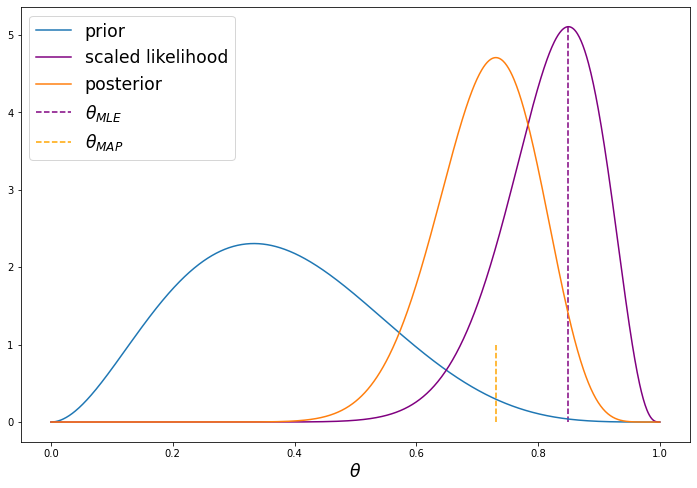

In [25]:
plt.figure(figsize=[12, 8])
x = np.linspace(1e-5, 1-1e-5, 1000)

# Plot the prior distribution
log_prior = compute_log_prior(x, a, b)
prior = np.exp(log_prior)
plt.plot(x, prior, label='prior')

# Plot the likelihood
log_likelihood = compute_log_likelihood(x, samples)
likelihood = np.exp(log_likelihood)
int_likelihood = np.mean(likelihood)
# We rescale the likelihood - otherwise it would be impossible to see in the plot
rescaled_likelihood = likelihood / int_likelihood
plt.plot(x, rescaled_likelihood, label='scaled likelihood', color='purple')

# Plot the posterior distribution
log_posterior = compute_log_posterior(x, samples, a, b)
posterior = np.exp(log_posterior)
plt.plot(x, posterior, label='posterior')

# Visualize theta_mle
theta_mle = compute_theta_mle(samples)
ymax = np.exp(compute_log_likelihood(np.array([theta_mle]), samples)) / int_likelihood
plt.vlines(x=theta_mle, ymin=0.00, ymax=ymax, linestyle='dashed', color='purple', label=r'$\theta_{MLE}$')


# Visualize theta_map
theta_map = compute_theta_map(samples, a, b)
ymax = np.exp(compute_log_posterior(np.array([theta_map]), samples, a, b))
plt.vlines(x=theta_map, ymin=0.00, ymax=ymax, linestyle='dashed', color='orange', label=r'$\theta_{MAP}$')

plt.xlabel(r'$\theta$', fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.show()